<a href="https://colab.research.google.com/github/raghavaraghav3/CS-5783/blob/main/Assignment%204/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import math
import statistics as s
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from operator import itemgetter
import random

**Question 1**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx')
df

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [5]:
houseData = df[df['Construction type'] == 'House']
houseData

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
10,11,5.8282,1.0,6.4350,1.225,2.0,6,3,32,House
11,12,5.3003,1.0,4.9883,1.552,1.0,6,3,30,House
12,13,6.2712,1.0,5.5200,0.975,1.0,5,2,30,House
15,16,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
17,18,6.6969,1.5,6.9020,1.488,1.5,7,3,22,House


In [6]:
condoData = df[df['Construction type'] == 'Condo']
condoData

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,Condo
5,6,3.8910,1.0,4.455,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.850,1.240,1.0,7,3,51,Condo
8,9,16.4202,2.5,9.800,3.420,2.0,10,5,42,Condo
13,14,5.9592,1.0,6.666,1.121,2.0,6,3,32,Condo
18,19,7.7841,1.5,7.102,1.376,1.0,6,3,17,Condo


In [7]:
apartmentData = df[df['Construction type'] == 'Apartment']
apartmentData

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,Apartment
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,Apartment
9,10,14.4598,2.5,12.800,3.000,2.0,9,5,14,Apartment
14,15,5.0500,1.0,5.000,1.020,0.0,5,2,46,Apartment
16,17,8.2464,1.5,5.150,1.664,2.0,8,4,50,Apartment
19,20,9.0384,1.0,7.800,1.500,1.5,7,3,23,Apartment


In [8]:
apt_probab = len(apartmentData)/20
condo_probab = len(condoData)/20
house_probab = len(houseData)/20

print("apt_probab: ", apt_probab)
print("condo_probab: ", condo_probab)
print("house_probab: ",house_probab)

apt_probab:  0.35
condo_probab:  0.3
house_probab:  0.35


In [9]:
df_test = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx', "Test")
df_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [10]:
def probcal(val, mean, std_dev):
  return (1/(math.sqrt(2*math.pi*(std_dev**2))))*(math.e)**((-1)*((val-mean)**2)/(2*(std_dev**2)))

In [11]:
#Calculating for Bathroom
BR_Apt_mean = apartmentData['Bathrooms'].mean()
print(BR_Apt_mean)

BR_Apt_var = apartmentData['Bathrooms'].var()
print(BR_Apt_var)

BR_Apt_sd = math.sqrt(BR_Apt_var)
print(BR_Apt_sd)

BR_condo_mean = condoData['Bathrooms'].mean()
print(BR_condo_mean)

BR_condo_var = condoData['Bathrooms'].var()
print(BR_condo_var)

BR_condo_sd = math.sqrt(BR_condo_var)
print(BR_condo_sd)

BR_hse_mean = houseData['Bathrooms'].mean()
print(BR_hse_mean)

BR_hse_var = houseData['Bathrooms'].var()
print(BR_hse_var)

BR_hse_sd = math.sqrt(BR_hse_var)
print(BR_hse_sd)

1.2857142857142858
0.32142857142857145
0.5669467095138409
1.3333333333333333
0.36666666666666675
0.6055300708194984
1.0714285714285714
0.03571428571428572
0.18898223650461363


In [12]:
p_Bath_A = [probcal(x, BR_Apt_mean, BR_Apt_sd) for x in df_test['Bathrooms']]
print(p_Bath_A)

p_Bath_C = [probcal(x, BR_condo_mean, BR_condo_sd) for x in df_test['Bathrooms']]
print(p_Bath_C)

p_Bath_H = [probcal(x, BR_hse_mean, BR_hse_sd) for x in df_test['Bathrooms']]
print(p_Bath_H)

[0.655159122187218, 0.655159122187218, 0.6197539752736433, 0.655159122187218, 0.655159122187218]
[0.6343424891780471, 0.6343424891780471, 0.5662029872883696, 0.6343424891780471, 0.6343424891780471]
[0.16133620692951756, 0.16133620692951756, 1.965477366561654, 0.16133620692951756, 0.16133620692951756]


In [13]:
#Calculating for Rooms
R_Apt_mean = apartmentData['# Rooms'].mean()
print(R_Apt_mean)

R_Apt_var = apartmentData['# Rooms'].var()
print(R_Apt_var)

R_Apt_sd = math.sqrt(R_Apt_var)
print(R_Apt_sd)

R_condo_mean = condoData['# Rooms'].mean()
print(R_condo_mean)

R_condo_var = condoData['# Rooms'].var()
print(R_condo_var)

R_condo_sd = math.sqrt(R_condo_var)
print(R_condo_sd)

R_hse_mean = houseData['# Rooms'].mean()
print(R_hse_mean)

R_hse_var = houseData['# Rooms'].var()
print(R_hse_var)

R_hse_sd = math.sqrt(R_hse_var)
print(R_hse_sd)

6.857142857142857
1.8095238095238095
1.3451854182690985
6.833333333333333
2.5666666666666673
1.6020819787597222
6.142857142857143
0.4761904761904763
0.6900655593423543


In [14]:
p_R_A = [probcal(x, R_Apt_mean, R_Apt_sd) for x in df_test['# Rooms']]
print(p_R_A)

p_R_C = [probcal(x, R_condo_mean, R_condo_sd) for x in df_test['# Rooms']]
print(p_R_C)

p_R_H = [probcal(x, R_hse_mean, R_hse_sd) for x in df_test['# Rooms']]
print(p_R_H)

[0.24208220679655826, 0.2067235987252604, 0.2949027930731713, 0.2067235987252604, 0.24208220679655826]
[0.21750706666186462, 0.19101676719028102, 0.2476710539275419, 0.19101676719028102, 0.21750706666186462]
[0.5658657429025208, 0.015461558501499521, 0.2672960502890973, 0.015461558501499521, 0.5658657429025208]


In [15]:
#Calculating for Local Price
LP_Apt_mean = apartmentData['Local Price'].mean()
print(LP_Apt_mean)

LP_Apt_var = apartmentData['Local Price'].var()
print(LP_Apt_var)

LP_Apt_sd = math.sqrt(LP_Apt_var)
print(LP_Apt_sd)

LP_condo_mean = condoData['Local Price'].mean()
print(LP_condo_mean)

LP_condo_var = condoData['Local Price'].var()
print(LP_condo_var)

LP_condo_sd = math.sqrt(LP_condo_var)
print(LP_condo_sd)

LP_hse_mean = houseData['Local Price'].mean()
print(LP_hse_mean)

LP_hse_var = houseData['Local Price'].var()
print(LP_hse_var)

LP_hse_sd = math.sqrt(LP_hse_var)
print(LP_hse_sd)

7.332742857142857
13.075436006190474
3.615997235368201
7.415900000000001
21.263606808000006
4.611247858009804
5.760742857142858
0.3250382628571429
0.5701212703075924


In [16]:
p_LP_A = [probcal(x, LP_Apt_mean, LP_Apt_sd) for x in df_test['Local Price']]
print(p_LP_A)

p_LP_C = [probcal(x, LP_condo_mean, LP_condo_sd) for x in df_test['Local Price']]
print(p_LP_C)

p_LP_H = [probcal(x, LP_hse_mean, LP_hse_sd) for x in df_test['Local Price']]
print(p_LP_H)

[0.104030659421769, 0.10595785224429283, 0.10761173097460622, 0.09735171295748794, 0.04796463038138255]
[0.08302757866422468, 0.08471801076743375, 0.08545493617189354, 0.08066393223053595, 0.05278295004888359]
[0.5904013268564853, 2.1328523148783713e-05, 0.00011563989763585457, 1.617372698750193e-08, 6.890042630928645e-27]


In [17]:
#Calculating for Land Area
LA_Apt_mean = apartmentData['Land Area'].mean()
print(LA_Apt_mean)

LA_Apt_var = apartmentData['Land Area'].var()
print(LA_Apt_var)

LA_Apt_sd = math.sqrt(LA_Apt_var)
print(LA_Apt_sd)

LA_condo_mean = condoData['Land Area'].mean()
print(LA_condo_mean)

LA_condo_var = condoData['Land Area'].var()
print(LA_condo_var)

LA_condo_sd = math.sqrt(LA_condo_var)
print(LA_condo_sd)

LA_hse_mean = houseData['Land Area'].mean()
print(LA_hse_mean)

LA_hse_var = houseData['Land Area'].var()
print(LA_hse_var)

LA_hse_sd = math.sqrt(LA_hse_var)
print(LA_hse_sd)

6.103857142857143
10.617884142857147
3.25850949712551
6.0246666666666675
6.475891866666667
2.5447773707471284
6.6309
5.057880536666667
2.2489732183080053


In [18]:
p_LandA_A = [probcal(x, LA_Apt_mean, LA_Apt_sd) for x in df_test['Land Area']]
print(p_LandA_A)

p_LandA_C = [probcal(x, LA_condo_mean, LA_condo_sd) for x in df_test['Land Area']]
print(p_LandA_C)

p_LandA_H = [probcal(x, LA_hse_mean, LA_hse_sd) for x in df_test['Land Area']]
print(p_LandA_H)


[0.12021606660940737, 0.07909075948113442, 0.10336228736525278, 0.11411287805008329, 0.11560361546158884]
[0.1509188868839599, 0.07374507802109002, 0.1159903302613669, 0.13754919421620768, 0.1445619531961421]
[0.17722843680648953, 0.09472883824366111, 0.14738445823905671, 0.16911044219596208, 0.13637430090925043]


In [19]:
#Calculating for Living Area
LiA_Apt_mean = apartmentData['Living area'].mean()
print(LiA_Apt_mean)

LiA_Apt_var = apartmentData['Living area'].var()
print(LiA_Apt_var)

LiA_Apt_sd = math.sqrt(LiA_Apt_var)
print(LiA_Apt_sd)

LiA_condo_mean = condoData['Living area'].mean()
print(LiA_condo_mean)

LiA_condo_var = condoData['Living area'].var()
print(LiA_condo_var)

LiA_condo_sd = math.sqrt(LiA_condo_var)
print(LiA_condo_sd)

LiA_hse_mean = houseData['Living area'].mean()
print(LiA_hse_mean)

LiA_hse_var = houseData['Living area'].var()
print(LiA_hse_var)

LiA_hse_sd = math.sqrt(LiA_hse_var)
print(LiA_hse_sd)

1.5050000000000001
0.49576500000000007
0.7041058159112166
1.5533333333333335
0.8527438666666667
0.9234413173919969
1.3917142857142857
0.04533657142857142
0.21292386298527327


In [20]:
#Living Area
p_LivingA_A = [probcal(x, LiA_Apt_mean, LiA_Apt_sd) for x in df_test['Living area']]
print(p_LivingA_A)

p_LivingA_C = [probcal(x, LiA_condo_mean, LiA_condo_sd) for x in df_test['Living area']]
print(p_LivingA_C)

p_LivingA_H = [probcal(x, LiA_hse_mean, LiA_hse_sd) for x in df_test['Living area']]
print(p_LivingA_H)


[0.5543796725242972, 0.5258559814408146, 0.5665936412343926, 0.5090058583530391, 0.5158539695850802]
[0.42955795191803636, 0.41952870202310416, 0.4314008668797229, 0.41292190293772113, 0.4015223358609729]
[0.8875483087028173, 0.3644875457695885, 1.6304112815824785, 0.22305590102536393, 1.2492357904339275]


In [21]:
#Calculating for Garages
G_Apt_mean = apartmentData['# Garages'].mean()
print(G_Apt_mean)

G_Apt_var = apartmentData['# Garages'].var()
print(G_Apt_var)

G_Apt_sd = math.sqrt(G_Apt_var)
print(G_Apt_sd)

G_condo_mean = condoData['# Garages'].mean()
print(G_condo_mean)

G_condo_var = condoData['# Garages'].var()
print(G_condo_var)

G_condo_sd = math.sqrt(G_condo_var)
print(G_condo_sd)

G_hse_mean = houseData['# Garages'].mean()
print(G_hse_mean)

G_hse_var = houseData['# Garages'].var()
print(G_hse_var)

G_hse_sd = math.sqrt(G_hse_var)
print(G_hse_sd)

1.2142857142857142
0.48809523809523814
0.6986381310057719
1.3333333333333333
0.2666666666666667
0.5163977794943223
1.0714285714285714
0.7023809523809524
0.8380817098475258


In [22]:
#Number of Garages
p_G_A = [probcal(x, G_Apt_mean, G_Apt_sd) for x in df_test['# Garages']]
print(p_G_A)

p_G_C = [probcal(x, G_condo_mean, G_condo_sd) for x in df_test['# Garages']]
print(p_G_C)

p_G_H = [probcal(x, G_hse_mean, G_hse_sd) for x in df_test['# Garages']]
print(p_G_H)

[0.5447902097516861, 0.3033948009056492, 0.3033948009056492, 0.5252190525210115, 0.3033948009056492]
[0.6272601284059216, 0.3357481523835587, 0.3357481523835587, 0.7333413866660147, 0.3357481523835587]
[0.4742926147813565, 0.25766362893434347, 0.25766362893434347, 0.41767591879226046, 0.25766362893434347]


In [23]:
#Calculating for Bedrooms
B_Apt_mean = apartmentData['# Bedrooms'].mean()
print(B_Apt_mean)

B_Apt_var = apartmentData['# Bedrooms'].var()
print(B_Apt_var)

B_Apt_sd = math.sqrt(B_Apt_var)
print(B_Apt_sd)

B_condo_mean = condoData['# Bedrooms'].mean()
print(B_condo_mean)

B_condo_var = condoData['# Bedrooms'].var()
print(B_condo_var)

B_condo_sd = math.sqrt(B_condo_var)
print(B_condo_sd)

B_hse_mean = houseData['# Bedrooms'].mean()
print(B_hse_mean)

B_hse_var = houseData['# Bedrooms'].var()
print(B_hse_var)

B_hse_sd = math.sqrt(B_hse_var)
print(B_hse_sd)

3.4285714285714284
0.9523809523809524
0.9759000729485332
3.3333333333333335
0.6666666666666666
0.816496580927726
3.0
0.3333333333333333
0.5773502691896257


In [24]:
#Number of Bedrooms
p_Bed_A = [probcal(x, B_Apt_mean, B_Apt_sd) for x in df_test['# Bedrooms']]
print(p_Bed_A)

p_Bed_C = [probcal(x, B_condo_mean, B_condo_sd) for x in df_test['# Bedrooms']]
print(p_Bed_C)

p_Bed_H = [probcal(x, B_hse_mean, B_hse_sd) for x in df_test['# Bedrooms']]
print(p_Bed_H)

[0.3712156855810032, 0.3443929343207638, 0.3712156855810032, 0.3443929343207638, 0.3712156855810032]
[0.4495360120501389, 0.35009899820344476, 0.4495360120501389, 0.35009899820344476, 0.4495360120501389]
[0.690988298942671, 0.1541803298037693, 0.690988298942671, 0.1541803298037693, 0.690988298942671]


In [25]:
#Calculating for Age of Home
Age_Apt_mean = apartmentData['Age of home'].mean()
print(Age_Apt_mean)

Age_Apt_var = apartmentData['Age of home'].var()
print(Age_Apt_var)

Age_Apt_sd = math.sqrt(Age_Apt_var)
print(Age_Apt_sd)

Age_condo_mean = condoData['Age of home'].mean()
print(Age_condo_mean)

Age_condo_var = condoData['Age of home'].var()
print(Age_condo_var)

Age_condo_sd = math.sqrt(Age_condo_var)
print(Age_condo_sd)

Age_hse_mean = houseData['Age of home'].mean()
print(Age_hse_mean)

Age_hse_var = houseData['Age of home'].var()
print(Age_hse_var)

Age_hse_sd = math.sqrt(Age_hse_var)
print(Age_hse_sd)

38.714285714285715
215.57142857142856
14.682350921137546
39.666666666666664
194.66666666666666
13.9522996909709
34.285714285714285
161.9047619047619
12.724180205607036


In [26]:
#Calculating for Age of Home
p_Age_A = [probcal(x, Age_Apt_mean, Age_Apt_sd) for x in df_test['Age of home']]
print(p_Age_A)

p_Age_C = [probcal(x, Age_condo_mean, Age_condo_sd) for x in df_test['Age of home']]
print(p_Age_C)

p_Age_H = [probcal(x, Age_hse_mean, Age_hse_sd) for x in df_test['Age of home']]
print(p_Age_H)

[0.02546662890532018, 0.022246396889061503, 0.0014101988936293236, 0.023668418857813782, 0.022783507450468816]
[0.027246955908518125, 0.023922150258416267, 0.000904815748946223, 0.023576489886851435, 0.02249202907637942]
[0.023426878989545683, 0.017539794542178463, 0.0015258635445194815, 0.030324994492146016, 0.029624150391064537]


In [27]:
MAP = []
for i in range(0, 5):
  total_prob_Apt = p_LP_A[i] * p_LandA_A[i] * p_Bath_A[i] * p_LivingA_A[i] * p_G_A[i] * p_R_A[i] * p_Bed_A[i] * p_Age_A[i] * apt_probab
  total_prob_Con = p_LP_C[i] * p_LandA_C[i] * p_Bath_C[i] * p_LivingA_C[i] * p_G_C[i] * p_R_C[i] * p_Bed_C[i] * p_Age_C[i] * condo_probab
  total_prob_Hos = p_LP_H[i] * p_LandA_H[i] * p_Bath_H[i] * p_LivingA_H[i] * p_G_H[i] * p_R_H[i] * p_Bed_H[i] * p_Age_H[i] * house_probab
  lst = []
  lst.append(total_prob_Apt)
  lst.append(total_prob_Con)
  lst.append(total_prob_Hos)
  MAP.append(lst)

misclassify = 0
for i in range(0, 5):
  probab = MAP[i]
  clss = ""
  if np.argmax(MAP[i]) == 0:
    clss = "APARTMENT"
    print("")
    print("The predicted class for",i,"is", clss, "and the actual class is",(df_test["Construction type"][i]).upper())
    print("The probability of APARTMENT is",MAP[0][0])
    print("The probability of CONDO is",MAP[0][1])
    print("The probability of HOUSE is",MAP[0][2])
  if np.argmax(MAP[i]) == 1:
    clss = "CONDO"
    print("")
    print("The predicted class for",i,"is", clss, "and the actual class is",(df_test["Construction type"][i]).upper())
    print("The probability of APARTMENT is",MAP[1][0])
    print("The probability of CONDO is",MAP[1][1])
    print("The probability of HOUSE is",MAP[1][2])
  if np.argmax(MAP[i]) == 2:
    clss = "HOUSE"
    print("")
    print("The predicted class for",i,"is", clss, "and the actual class is",(df_test["Construction type"][i]).upper())
    print("The probability of APARTMENT is",MAP[2][0])
    print("The probability of CONDO is",MAP[2][1])
    print("The probability of HOUSE is",MAP[2][2])
  if clss.lower() != (df_test["Construction type"][i]).lower():
    misclassify += 1 
print("# Misclassified: ", misclassify, "vs Correct: ", 5-misclassify) 


The predicted class for 0 is HOUSE and the actual class is APARTMENT
The probability of APARTMENT is 6.40286726974593e-08
The probability of CONDO is 2.4566703656852764e-08
The probability of HOUSE is 1.38811261786474e-09

The predicted class for 1 is APARTMENT and the actual class is HOUSE
The probability of APARTMENT is 1.982147379161192e-06
The probability of CONDO is 1.7117341592585917e-06
The probability of HOUSE is 2.2783346320526746e-05

The predicted class for 2 is APARTMENT and the actual class is HOUSE
The probability of APARTMENT is 1.982147379161192e-06
The probability of CONDO is 1.7117341592585917e-06
The probability of HOUSE is 2.2783346320526746e-05

The predicted class for 3 is APARTMENT and the actual class is APARTMENT
The probability of APARTMENT is 1.982147379161192e-06
The probability of CONDO is 1.7117341592585917e-06
The probability of HOUSE is 2.2783346320526746e-05

The predicted class for 4 is CONDO and the actual class is APARTMENT
The probability of APARTM

**Question 2**

In [28]:
df_train = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Train")
df_test = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Test")

**Getting Train and Test sets**

In [29]:
x_train = df_train[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
y_train = df_train['Construction type']
x_test = df_test[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
y_test = df_test['Construction type']

In [30]:
decision_tree = DT()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5833333333333334, 0.9166666666666666, 'Age of home <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]\nclass = Apartment'),
 Text(0.4166666666666667, 0.75, 'Local Price <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]\nclass = House'),
 Text(0.3333333333333333, 0.5833333333333334, 'Local Price <= 7.24\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]\nclass = House'),
 Text(0.25, 0.4166666666666667, 'Living area <= 1.173\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = House'),
 Text(0.16666666666666666, 0.25, 'Age of home <= 31.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Condo'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = House'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Condo'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = House'),
 Text(0.4166666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0

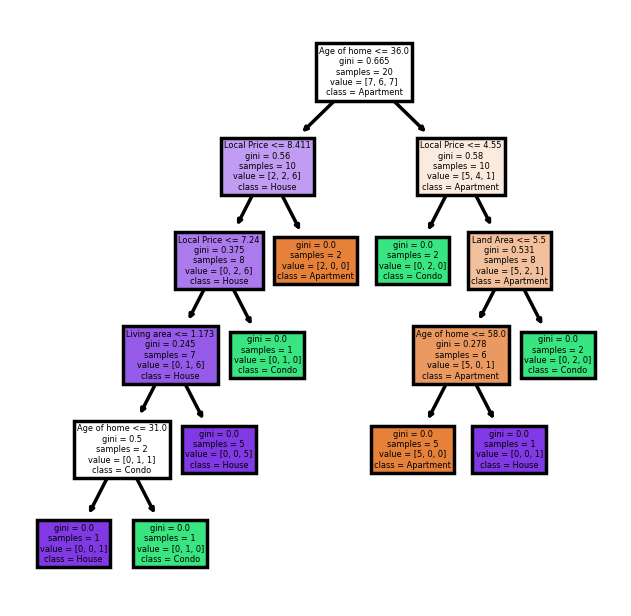

In [31]:
features= ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
classes = ['Apartment', 'Condo', 'House']
plt.subplots(figsize = (3, 3), dpi=250)
tree.plot_tree(decision_tree,feature_names = features, class_names = classes, filled=True)

In [32]:
train_accuracy = decision_tree.score(x_train, y_train)
print("Training Accuracy: ", train_accuracy)

Training Accuracy:  1.0


**2.1** It is the training data, so the accuracy is 100%

In [33]:
test_accuracy = decision_tree.score(x_test, y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.4


**2.1** It is the test data, so the accuracy falls down to 40%

**2.2** Testing with different depths

In [34]:
lst_train_acc = []
lst_test_acc = []
for depth in range(1, 10):
  x_DT = DT(max_depth = depth)
  x_DT.fit(x_train, y_train)
  tr_acc = x_DT.score(x_train, y_train)
  tst_acc = x_DT.score(x_test, y_test)
  lst_train_acc.append(tr_acc)
  lst_test_acc.append(tst_acc)
  print("Depth", depth, "\tTraining Accuracy: ", tr_acc*100, "%\tTest Accuracy: ", tst_acc)

Depth 1 	Training Accuracy:  55.00000000000001 %	Test Accuracy:  0.4
Depth 2 	Training Accuracy:  75.0 %	Test Accuracy:  0.8
Depth 3 	Training Accuracy:  90.0 %	Test Accuracy:  0.4
Depth 4 	Training Accuracy:  95.0 %	Test Accuracy:  0.4
Depth 5 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 6 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 7 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 8 	Training Accuracy:  100.0 %	Test Accuracy:  0.4
Depth 9 	Training Accuracy:  100.0 %	Test Accuracy:  0.4


Text(0.5, 1.0, 'Accuracy vs Depths')

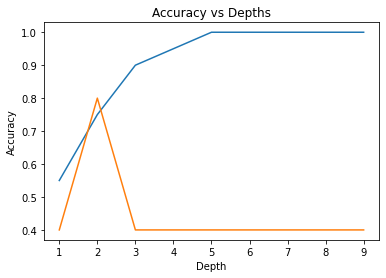

In [35]:
plt.plot(range(1,10), lst_train_acc,label="Train")
plt.plot(range(1,10), lst_test_acc,label="Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depths")

**2.2** The maximum prediction is 80% at depth 2

**2.3** As the depth increases, the test accuracy actually fells down as the depth increases. This is because more classifications are needed and there is high chance of mis prediction. The maximum correct prediction I got is 80% at depth 2

**2.4**

[Text(0.5833333333333334, 0.9166666666666666, 'Age of home <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]\nclass = Apartment'),
 Text(0.4166666666666667, 0.75, 'Local Price <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]\nclass = House'),
 Text(0.3333333333333333, 0.5833333333333334, 'Local Price <= 7.24\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]\nclass = House'),
 Text(0.25, 0.4166666666666667, 'Living area <= 1.173\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = House'),
 Text(0.16666666666666666, 0.25, 'Age of home <= 31.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Condo'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = House'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Condo'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = House'),
 Text(0.4166666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0

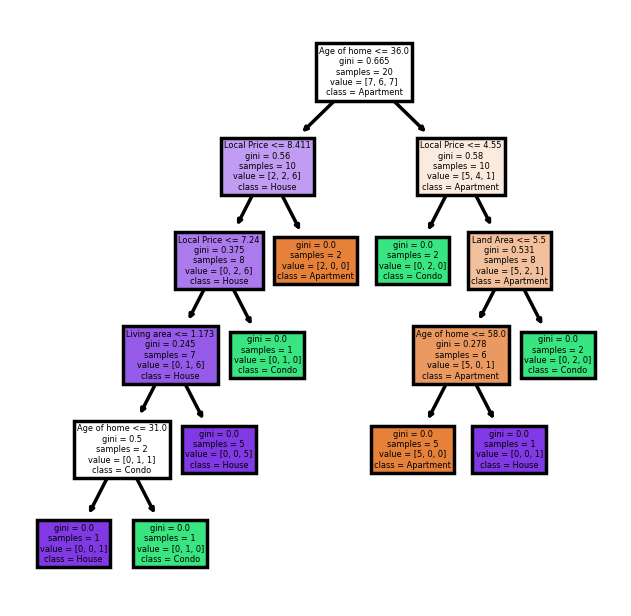

In [36]:
dt_2 = DT(max_depth=2)
dt_2.fit(x_train, y_train)
features= ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
classes = ['Apartment', 'Condo', 'House']
plt.subplots(figsize = (3, 3), dpi=250)
tree.plot_tree(decision_tree,feature_names = features, class_names = classes, filled=True)

In [37]:
print("The Predicted Class for the above values is : ", dt_2.predict([[9.0384, 1,7.8,1.5,1.5,7,3,23]]))

The Predicted Class for the above values is :  ['Apartment']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Question 3**

In [38]:
df_train = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Train")
df_test = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Test")

In [39]:
x_train = df_train[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
y_train = df_train['Construction type']
x_test = df_test[['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']]
y_test = df_test['Construction type']

In [69]:
def euclidean_distance(test_instance, training_lst, no_neighbours):
  dist_lst = []
  row_num = 0
  for j in training_lst:
    d = 0
    for i in range(0, len(test_instance)):
      d = d + (test_instance[i] - j[i])**2
    dist_lst.append([row_num, math.sqrt(d), y_train[row_num]])
    row_num += 1
  dist_lst = sorted(dist_lst, key=itemgetter(1), reverse=False)
  return dist_lst[0:no_neighbours]

In [70]:
def predict_class(test_point, traning_set, no_neighbour):
  closest_k_pts = euclidean_distance(test_point, traning_set, no_neighbour)

  apt, condo, house = 0, 0, 0
  for i in range(len(closest_k_pts)):
    if closest_k_pts[i][2].upper() == "Apartment".upper():
      apt += 1
    if closest_k_pts[i][2].upper() == "Condo".upper():
      condo += 1
    if closest_k_pts[i][2].upper() == "House".upper():
      house += 1
  if apt >= condo and apt >= house:
    class_predicted= "APARTMENT"  
  elif house >= condo and house >= apt:
    class_predicted= "HOUSE"
  elif condo >= apt and condo >= house:
    class_predicted= "CONDO"

  return class_predicted

In [71]:
def accuracy_res(x_train_lst, x_test_lst, y_train, y_test, neighbours):
  accuracy = 0
  correct_classified = 0
  misclassified = 0
  for i in range(len(x_test_lst)):
    predicted = predict_class(x_test_lst[i], x_train_lst, neighbours)
    if predicted.upper() == y_test[i].upper():
      correct_classified += 1
    elif predicted.upper() != y_test[i].upper():
      misclassified += 1
  accuracy=correct_classified/len(x_test_lst)

  return accuracy

In [72]:
acc_values= []
k_values = list(range(1,10))
for i in range(1, 10):
  acc = accuracy_res(x_train.values.tolist(), x_test.values.tolist(), y_train, y_test, i)
  acc_values.append(acc)

print(k_values)
print(acc_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4]


Text(0.5, 1.0, 'Accuracy vs K values')

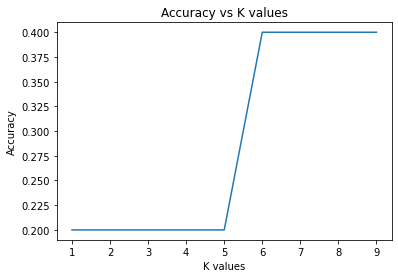

In [73]:
plt.plot(k_values, acc_values)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K values")

**3 Answer**
I have tested with K ranging from 1 to 6. For neighbours from 6, the maximum accuracy of 40% is achieved and constant through out.

I have used three functions:

euclidean_distance: calculates distance for each test instance with each training test with variable number of neighbours.

predict_class: This predicts the class for each test point

accuracy_res: takes the input and returns the accuracy for each value of K neighbour 